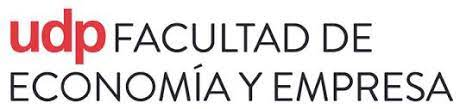


# UDP - Bussines Analytics 1

### Control 1 (15%):

<h4 align="center">
:construction: Proyecto en construcción :construction:
</h4>

# CONTROL: Caso Práctico Retail (15%, 1 de 2)

### Trabajo práctico a ser desarrollado en grupos de 3 estudiantes máx

Se tiene una base de datos de clientes que se desea analizar, para saber:

1. Que tiendas son las más rentables?
2. Que perfil de clientes explica esta rentabilidad?


La información que se tiene está contenida en las siguientes columnas y su definición:

* bird year: año de nacimiento
* store: tienda a la que asiste el cliente
* sex: sexo del cliente (1=H , 2=M)
* age: edad del cliente
* buy: variable binaria (1=S, 2=N)
* flat_C: piso de la tienda donde se produce la venta (0=hall, 1=deporte, 2=ropa, 3=calzado)
* flat_2: piso de la tienda donde se produce la venta (1=tech, 2=muebles,3=outdoor)
* nse: nivel socio economico (A, B, C)
* park: uso estacionamiento (S=si, N=no)
* re buy: probabilidad de recompra (float entre 0 y 1)
* sale (tax incl): monto de la venta (IVA incluído)
* channel: canal de venta (1=presencial, 2=internet)
* tpo_: tiempo de permanencia comprando (minutos)
* unnamed 0: sin información
* unnamed_1: sin información

### Funciones Estadísticas Clásicas
   * median
   * average
   * mean
   * std
   * var


***Link a consultar:*** https://numpy.org/doc/stable/reference/routines.statistics.html

## :hammer: Resolver las siguientes preguntas

### Considere lo siguientes supuestos:
* Variable objetivo **ventas_netas**
  * Debe crear una columna con el nombre ventas_netas
  * Calcular el valor de la venta sin IVA, asuma 19%
* Errores en la data: es muy común que existan, y debe resolver situaciones tales como:
  * Datos faltantes: explique como los rellenará y el supuesto que asumirá ría(recomiendo investigar librería Pandas, función ffill y bfill)
  * Distintos tipos de datos en la misma columna: deberá corregir, reemplazar y explicar los supuestos asumidos
  * Data mal registrada: corrección en nombres o respuestas de variables



## Instalación de ambiente de trabajo

In [6]:
#!/usr/bin/env python
#-*- coding: utf-8 -*-


# Instalación de librerías
# ! pip install missingno
# ! pip install --upgrade pip
# ! pip install sinfo

In [7]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# complementa algunas visualizaciones
%matplotlib inline
# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


# Cargamos la data disponible

In [8]:
data = pd.read_excel('retail01.xls')
data = pd.DataFrame(data)

data.head()

,bird year,store,sex,age,buy,flat_C,flat_2,nse,park,re buy,sale (tax incl),channel,tpo_,unnamed 0,unnamed_1
0,1983,1,2.0,40,1,3,1,B,S,0.641975,9509.0,1.0,NaN,,
1,1974,1,2.0,49,1,3,1,B,S,0.728940,32650.0,1.0,NaN,,
2,1993,2,2.0,30,1,1,1,C,0,0.711413,9898.0,1.0,11.0,,
3,1997,4,2.0,26,1,1,1,B,S,0.703295,2176.0,2.0,153.0,,
4,2007,1,2.0,16,1,1,1,A,S,0.152210,5557.0,1.0,NaN,,


# 1. Preprocesamiento de datos (3pts)

* Revisar la data y corregir de ser necesario.
* Registrar y explicar los supuestos que asuma

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bird year        1678 non-null   int64  
 1   store            1677 non-null   object 
 2   sex              1666 non-null   float64
 3   age              1678 non-null   int64  
 4   buy              1677 non-null   object 
 5   flat_C           1678 non-null   int64  
 6   flat_2           1678 non-null   int64  
 7   nse              1678 non-null   object 
 8   park             1678 non-null   object 
 9   re buy           1678 non-null   float64
 10  sale (tax incl)  1663 non-null   float64
 11  channel          1677 non-null   float64
 12  tpo_             1424 non-null   float64
 13  unnamed 0        1678 non-null   object 
 14  unnamed_1        1678 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 196.8+ KB


In [10]:
# Exploramos la columna:
data.columns

Index(['bird year', 'store', 'sex', 'age', 'buy', 'flat_C', 'flat_2', 'nse',
       'park', 're buy', 'sale (tax incl)', 'channel', 'tpo_', 'unnamed 0',
       'unnamed_1'],
      dtype='object')

In [11]:
# Aplicamos la función drop()
df = data.drop(['unnamed 0','unnamed_1' ], axis=1)
df.sample(10)


,bird year,store,sex,age,buy,flat_C,flat_2,nse,park,re buy,sale (tax incl),channel,tpo_
554,1977,Casa Matriz,2.0,46,1,1,1,A,0,0.441998,15236.0,1.0,8.0
1279,1998,4,1.0,25,1,3,3,B,S,0.546522,36212.0,1.0,27.0
1199,1979,4,1.0,44,1,3,3,B,S,0.406638,30205.0,2.0,80.0
173,1986,2,1.0,37,1,6,2,B,S,0.128114,11893.0,1.0,NaN
1284,1990,1,2.0,33,1,1,1,C,0,0.542573,25826.0,1.0,30.0
1165,1978,2,1.0,45,1,1,3,A,0,0.368694,9320.0,1.0,23.0
274,1994,Casa Matriz,2.0,29,1,3,1,B,S,0.754862,26216.0,2.0,167.0
282,2004,3,1.0,19,1,2,3,B,0,0.248541,1249.0,2.0,182.0
188,1997,2,2.0,26,2,1,2,A,S,0.726810,2208.0,2.0,226.0
1600,2006,2,1.0,17,1,1,1,B,0,0.303086,11401.0,2.0,94.0


In [12]:
df.columns

Index(['bird year', 'store', 'sex', 'age', 'buy', 'flat_C', 'flat_2', 'nse',
       'park', 're buy', 'sale (tax incl)', 'channel', 'tpo_'],
      dtype='object')

### Cambios de nombre de la variable

- [x] __ = __


In [13]:
# Para cambiar el nombre de una variable, se debe hacer en todas las celdas donde se usa
# df.rename(columns={'A':'a'}, inplace=True)
# inplace=True: para que se guarde el cambio en el dataframe
# {} : diccionario
# A: nombre de la columna que se quiere cambiar
# a: nuevo nombre de la columna
#df.rename(columns={'A':'a'}, inplace=True)

df.rename({'bird year':'birthyear','re buy':'re_buy', 'sale (tax incl)':'precio_final', 'tpo_':'time'}, axis='columns', inplace=True)
df.columns

Index(['birthyear', 'store', 'sex', 'age', 'buy', 'flat_C', 'flat_2', 'nse',
       'park', 're_buy', 'precio_final', 'channel', 'time'],
      dtype='object')

## Análisis de cada variable

In [14]:
# Variable bithyear
df.birthyear.isna().sum()

0

In [15]:
df.birthyear.describe()

count    1678.000000
mean     1993.051251
std        45.417231
min       194.000000
25%      1986.000000
50%      1994.000000
75%      2002.000000
max      2023.000000
Name: birthyear, dtype: float64

In [16]:
# Se detecta un dato atípico
df.birthyear.min()

194

In [17]:
# Se reemplaza el dato atípico por el valor 1945
df.birthyear.replace(194, 1945, inplace=True)
df.birthyear.replace(1872, 1986, inplace=True)

df.birthyear.describe()

count    1678.000000
mean     1994.162694
std        11.143253
min      1945.000000
25%      1986.000000
50%      1994.000000
75%      2002.000000
max      2023.000000
Name: birthyear, dtype: float64

In [18]:
# Variable: store
# df.store.value_counts()
df.store.isna().sum()
# df.store.isnull().sum()

1

In [19]:
# Se rellena el dato faltante con bfill() "before fill"
df.store.bfill(inplace=True)

In [20]:
# Se reemplaza el valor 1 por A, 2 por B, 3 por C, 4 por D
df.store.replace({'Casa Matriz':1, 'Matriz':1, 'Principal':1, 'Matriz ':1}, inplace=True)
df.store.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1678 entries, 0 to 1677
Series name: store
Non-Null Count  Dtype
--------------  -----
1678 non-null   int64
dtypes: int64(1)
memory usage: 13.2 KB


In [21]:
# Variable: sex
df.sex.value_counts()
# df.sex.isna().sum()
# df.sex.isnull().sum()


2.0    970
1.0    696
Name: sex, dtype: int64

In [22]:
# Se cambia el valor 1 por M y 2 por F
df.sex.replace({1:'M', 2:'F'}, inplace=True)

In [23]:
# Se desea reemplazar los valores nulos por la moda de la variable sex
df.sex.replace({np.nan:'F'}, inplace=True)


In [24]:
# Variable: age
df.age.describe()

count    1678.000000
mean       29.948749
std        45.417231
min         0.000000
25%        21.000000
50%        29.000000
75%        37.000000
max      1829.000000
Name: age, dtype: float64

In [25]:
# Se debe recalcular la edad
df['age2'] = 2023 - df.birthyear
df.age2.describe()

count    1678.000000
mean       28.837306
std        11.143253
min         0.000000
25%        21.000000
50%        29.000000
75%        37.000000
max        78.000000
Name: age2, dtype: float64

In [26]:
df.age2.replace({np.nan:df.age2.mean()}, inplace=True)
df.age2.describe()

count    1678.000000
mean       28.837306
std        11.143253
min         0.000000
25%        21.000000
50%        29.000000
75%        37.000000
max        78.000000
Name: age2, dtype: float64

In [27]:
# Se debe contar la cantidad de valores menores a 21
df[df.age2 < 21].age2.count()

400

In [28]:
# Reemplazan los valores menor a 21 por la media para evitar los valores atípicos
for i in df[df.age2 < 21].index:
    df.age2[i] = df.age2.mean()

df.age2.describe()

count    1678.000000
mean       32.757871
std         7.399440
min        21.000000
25%        28.000000
50%        31.136249
75%        37.000000
max        78.000000
Name: age2, dtype: float64

In [29]:
# df.buy.info()
# df.buy.isna().sum()
df.buy.isnull().sum()

1

In [30]:
# Usando la librería pandas ffill() se reemplaza el valor nulo por el valor anterior
df.buy.ffill(inplace=True)
df.buy.isnull().sum()

0

In [31]:
# Se reemplaza la letra '1' por el valor 'Y' y la letra '0' por el valor 'N'
df.buy.replace({1:'Y', 2:'N'}, inplace=True)
df.buy.replace({'S':'Y'}, inplace=True)
df.buy.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1678 entries, 0 to 1677
Series name: buy
Non-Null Count  Dtype 
--------------  ----- 
1678 non-null   object
dtypes: object(1)
memory usage: 13.2+ KB


In [32]:
# Variable: flat_C
#df.flat_C.isnull().sum()
# df.flat_C.isna().sum()
df.flat_C.value_counts()

3    618
2    594
1    354
6     74
0     38
Name: flat_C, dtype: int64

In [33]:
# Se reemplaza el valor 0 por 1
df.flat_C.replace({0:1}, inplace=True)
df.flat_C.value_counts()


3    618
2    594
1    392
6     74
Name: flat_C, dtype: int64

In [34]:
# Variable: flat_2
#df.flat_2.isnull().sum()
# df.flat_2.isna().sum()
df.flat_C.value_counts()

# Sin datos faltantes

3    618
2    594
1    392
6     74
Name: flat_C, dtype: int64

In [35]:
# Variable: nse
df.nse.value_counts()

B     572
A     560
C     542
a       2
a       1
aa      1
Name: nse, dtype: int64

In [36]:
# Se reemplaza el valor a y aa, por A
df.nse.replace({'a':'A', 'aa':'A', 'a ':'A'}, inplace=True)
df.nse.value_counts()

B    572
A    564
C    542
Name: nse, dtype: int64

In [37]:
# df.park.isna().sum()
# df.park.isnull().sum()
df.park.value_counts()

S    854
0    824
Name: park, dtype: int64

In [38]:
# Se reemplaza el valor 0 por N para dejarlo como categórico
df.park.replace({0:'N'}, inplace=True)
df.park.value_counts()

S    854
N    824
Name: park, dtype: int64

In [39]:
# Variable: re_buy
# df.re_buy.isna().sum()
# df.re_buy.isnull().sum()
df.re_buy.value_counts()

# No hay datos faltantes

0.641975    1
0.304931    1
0.140739    1
0.490450    1
0.146443    1
           ..
0.165393    1
0.633601    1
0.441998    1
0.027187    1
0.231778    1
Name: re_buy, Length: 1678, dtype: int64

In [40]:
# Variable: precio_final (con IVA)
# df.precio_final.isna().sum()
df.precio_final.isnull().sum()
# df.precio_final.describe()


15

In [41]:
# Se reemplazan los valores nulos por el dato anterior usando la librería pandas bfill()
df.precio_final.bfill(inplace=True)
df.precio_final.describe()

count     1678.000000
mean     22662.039928
std      19723.269588
min         18.000000
25%       6221.000000
50%      16891.500000
75%      33973.750000
max      86606.000000
Name: precio_final, dtype: float64

In [42]:
# Vamos a crear la variable precio sin IVA
df['venta_neto'] = df.precio_final / 1.19

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   birthyear     1678 non-null   int64  
 1   store         1678 non-null   int64  
 2   sex           1678 non-null   object 
 3   age           1678 non-null   int64  
 4   buy           1678 non-null   object 
 5   flat_C        1678 non-null   int64  
 6   flat_2        1678 non-null   int64  
 7   nse           1678 non-null   object 
 8   park          1678 non-null   object 
 9   re_buy        1678 non-null   float64
 10  precio_final  1678 non-null   float64
 11  channel       1677 non-null   float64
 12  time          1424 non-null   float64
 13  age2          1678 non-null   float64
 14  venta_neto    1678 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 196.8+ KB


In [44]:
# Variable: channel
# df.channel.isnull().sum()
# df.channel.isna().sum()
# Se reemplaza el dato faltante por la moda
# * channel: canal de venta (1=presencial, 2=internet)
df.channel.replace({np.nan:'presencial'}, inplace=True)
df.channel.replace({1:'presencial'}, inplace=True)
df.channel.replace({2:'internet'}, inplace=True)
df.channel.value_counts()

presencial    944
internet      734
Name: channel, dtype: int64

In [45]:
# Variable: time
# df.time.isnull().sum()
# df.time.isna().sum()
df.time.describe()

count    1424.000000
mean       80.023876
std        75.644363
min         1.000000
25%        15.000000
50%        48.000000
75%       143.250000
max       304.000000
Name: time, dtype: float64

In [46]:
# Se reemplaza el dato faltante por la media
df.time.replace({np.nan:df.time.mean()}, inplace=True)
df.time.describe()

count    1678.000000
mean       80.023876
std        69.680698
min         1.000000
25%        19.000000
50%        80.011938
75%       124.000000
max       304.000000
Name: time, dtype: float64

In [47]:
# Vamos a revisar el df para ver si hay que correjir algo más
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   birthyear     1678 non-null   int64  
 1   store         1678 non-null   int64  
 2   sex           1678 non-null   object 
 3   age           1678 non-null   int64  
 4   buy           1678 non-null   object 
 5   flat_C        1678 non-null   int64  
 6   flat_2        1678 non-null   int64  
 7   nse           1678 non-null   object 
 8   park          1678 non-null   object 
 9   re_buy        1678 non-null   float64
 10  precio_final  1678 non-null   float64
 11  channel       1678 non-null   object 
 12  time          1678 non-null   float64
 13  age2          1678 non-null   float64
 14  venta_neto    1678 non-null   float64
dtypes: float64(5), int64(5), object(5)
memory usage: 196.8+ KB


### Cambio de tipo de dato
1. Se cambiar algunos tipos de datos, para que sean más fáciles de trabajar
    1. Datos Categóricos: store, sex, flat_C, flat_2, nse, park, channel
    2. Datos Numéricos: bird_year, age, buy, re_buy, sale (tax incl), tpo_
        

In [48]:
# Cambio de tipo de datos a categoría u objeto a través de un ciclo for
# Se crea una lista con las variables que se desea cambiar
var_cat = ['store', 'sex', 'flat_C', 'flat_2', 'nse', 'park', 'channel']
# A través de un ciclo for se cambia el tipo de dato
for i in var_cat:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   birthyear     1678 non-null   int64   
 1   store         1678 non-null   category
 2   sex           1678 non-null   category
 3   age           1678 non-null   int64   
 4   buy           1678 non-null   object  
 5   flat_C        1678 non-null   category
 6   flat_2        1678 non-null   category
 7   nse           1678 non-null   category
 8   park          1678 non-null   category
 9   re_buy        1678 non-null   float64 
 10  precio_final  1678 non-null   float64 
 11  channel       1678 non-null   category
 12  time          1678 non-null   float64 
 13  age2          1678 non-null   float64 
 14  venta_neto    1678 non-null   float64 
dtypes: category(7), float64(5), int64(2), object(1)
memory usage: 117.5+ KB


In [49]:
#Cambiar el tipo de datos a int64
# Se crea una lista con las variables que se desea cambiar
var_int = ['precio_final', 'age2', 'venta_neto']
# A través de un ciclo for se cambia el tipo de dato
for i in var_int:
    df[i] = df[i].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   birthyear     1678 non-null   int64   
 1   store         1678 non-null   category
 2   sex           1678 non-null   category
 3   age           1678 non-null   int64   
 4   buy           1678 non-null   object  
 5   flat_C        1678 non-null   category
 6   flat_2        1678 non-null   category
 7   nse           1678 non-null   category
 8   park          1678 non-null   category
 9   re_buy        1678 non-null   float64 
 10  precio_final  1678 non-null   int64   
 11  channel       1678 non-null   category
 12  time          1678 non-null   float64 
 13  age2          1678 non-null   int64   
 14  venta_neto    1678 non-null   int64   
dtypes: category(7), float64(2), int64(5), object(1)
memory usage: 117.5+ KB


In [50]:
# ! pip install --upgrade missingno

<AxesSubplot: >

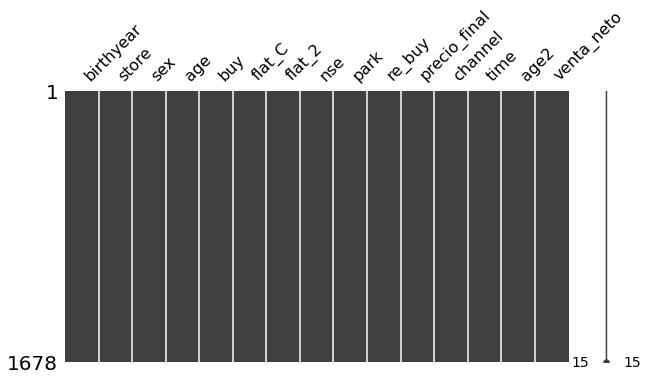

In [51]:
# # Se visualiza la matriz de datos faltantes
import missingno as msno
# # La librería missingno no permite visualizar los nombres de las variables
msno.matrix(df, figsize=(10,5))

## Se filta el dataframe por la variable buy con los que sí compran, para limitar la población a estudiar

In [52]:
# Se filtra el dataframe por la variable buy == 'Y'
df = df[df.buy == 'Y']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1673
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   birthyear     1021 non-null   int64   
 1   store         1021 non-null   category
 2   sex           1021 non-null   category
 3   age           1021 non-null   int64   
 4   buy           1021 non-null   object  
 5   flat_C        1021 non-null   category
 6   flat_2        1021 non-null   category
 7   nse           1021 non-null   category
 8   park          1021 non-null   category
 9   re_buy        1021 non-null   float64 
 10  precio_final  1021 non-null   int64   
 11  channel       1021 non-null   category
 12  time          1021 non-null   float64 
 13  age2          1021 non-null   int64   
 14  venta_neto    1021 non-null   int64   
dtypes: category(7), float64(2), int64(5), object(1)
memory usage: 79.8+ KB


# 2. Análisis Exploratorio de datos (2ptos)

* Analice de forma descriptiva los datos estudiados
  * Promedio, DS, Coef. Asimetría, Curtosis
  * Otras
* Utilice las librerías aprendidas en clase para calcular la estadística descriptiva
* Use gráficos para explicar su reporte.


In [53]:
df.describe(include='all')

,birthyear,store,sex,age,buy,flat_C,flat_2,nse,park,re_buy,precio_final,channel,time,age2,venta_neto
count,1021.000000,1021.0,1021,1021.000000,1021,1021.0,1021.0,1021,1021,1021.000000,1021.000000,1021,1021.000000,1021.000000,1021.000000
unique,NaN,4.0,2,NaN,1,4.0,3.0,3,2,NaN,NaN,2,NaN,NaN,NaN
top,NaN,1.0,F,NaN,Y,2.0,3.0,B,S,NaN,NaN,presencial,NaN,NaN,NaN
freq,NaN,499.0,594,NaN,1021,385.0,394.0,350,527,NaN,NaN,552,NaN,NaN,NaN
mean,1994.153771,NaN,NaN,30.672870,NaN,NaN,NaN,NaN,NaN,0.493023,22618.682664,NaN,82.995696,32.775710,19006.797258
std,11.349305,NaN,NaN,57.573216,NaN,NaN,NaN,NaN,NaN,0.285904,19744.554304,NaN,70.923975,7.502525,16592.066043
min,1945.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000640,25.000000,NaN,1.000000,21.000000,21.000000
25%,1986.000000,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,0.243860,6243.000000,NaN,20.000000,28.000000,5246.000000
50%,1994.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,0.499592,16661.000000,NaN,80.023876,31.000000,14000.000000
75%,2002.000000,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,0.730069,34038.000000,NaN,131.000000,37.000000,28603.000000


# Comportamiento entre las variables
1. Se aplica un coeficiente de correlación para ver la relación entre las variables numéricas.
2. Se visualiza el comportamiento entre las variables numéricas a través de un heatmap.

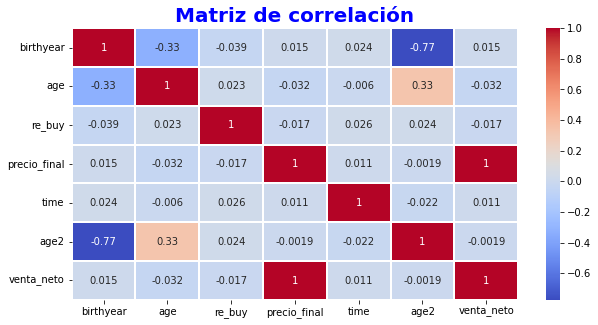

In [54]:
# Se calcula el coeficiente de correlación de Pearson
df.corr(method='pearson')
# Se visualiza la matriz de correlación a través de un mapa de calor de seaborn
plt.figure(figsize=(10,5))
plt.title('Matriz de correlación', fontsize=20, color='blue', fontweight='bold')
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', linewidths=0.1)
plt.show();


# Análisis Univariado
1. Se revisará y visualizará la distribución de los datos para obtener.
2. Se revisará y visualizará la estadistica descriptiva de las variables a analizar.

### Análisis Univariado: Variables Categóricas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


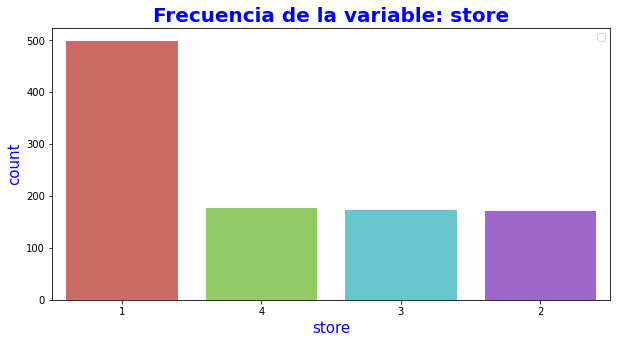

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


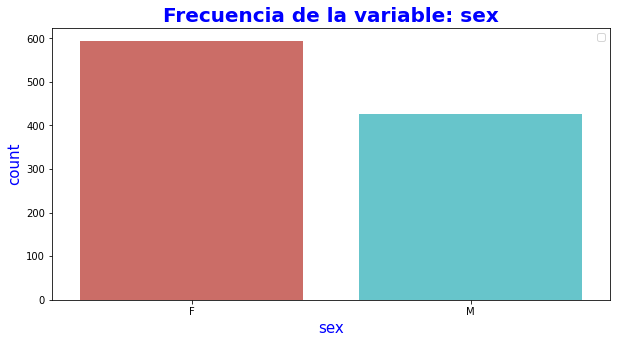

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


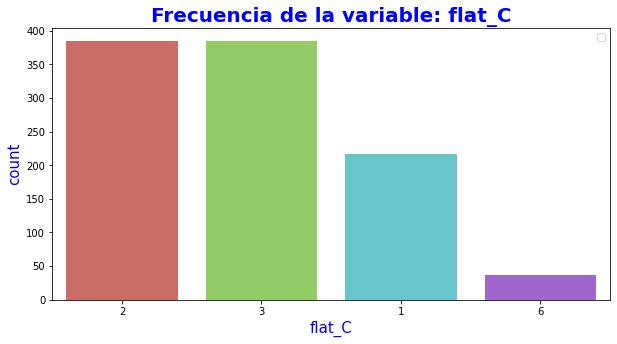

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


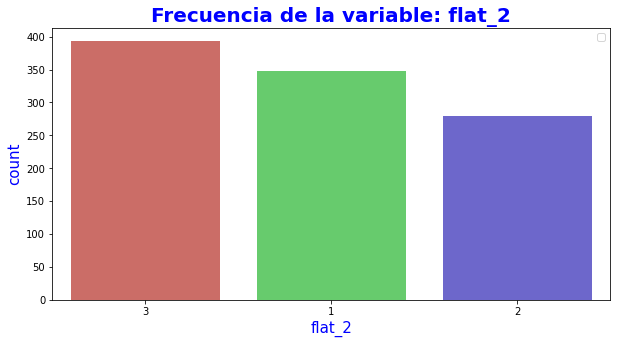

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


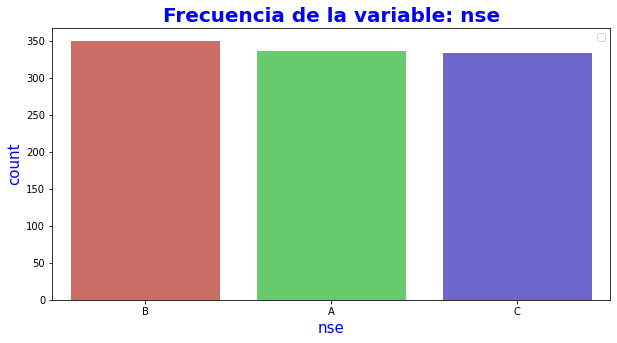

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


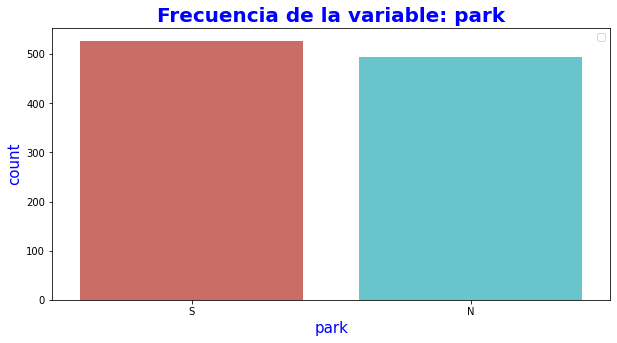

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


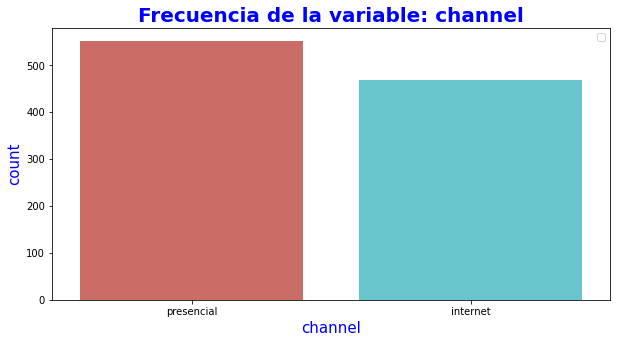

In [55]:
# A través de un ciclo for se visualiza el histograma de las variables categoricas
for i in var_cat:
    plt.figure(figsize=(10,5))
    # Se incluye el título de la gráfica
    plt.title('Frecuencia de la variable: ' + i, fontsize=20, color='blue', fontweight='bold')    
    # Se incluye un título para el eje x
    plt.xlabel(i, fontsize=15, color='blue')
    # Se incluye un título para el eje y
    plt.ylabel('Frecuencia', fontsize=15, color='blue')
    # Se crea el histograma
    sns.countplot(x=i, data=df, palette='hls', order=df[i].value_counts().index)
    # Se muestra la legenda
    plt.legend()
    # Se muestra la gráfica
    plt.show();

### Análisis Univariado: Variables Numéricas

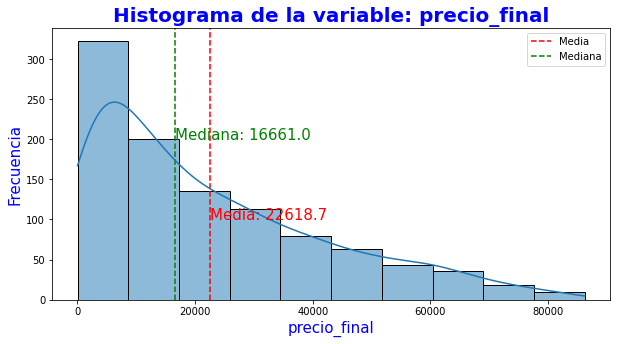

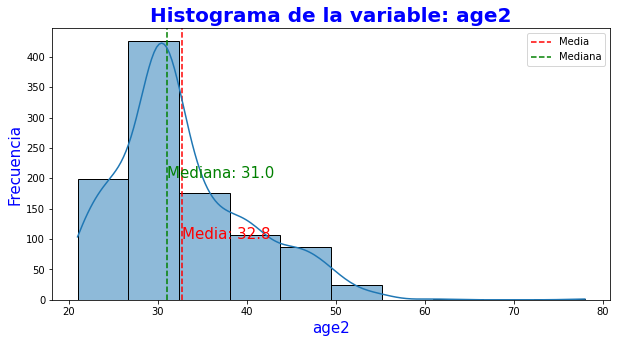

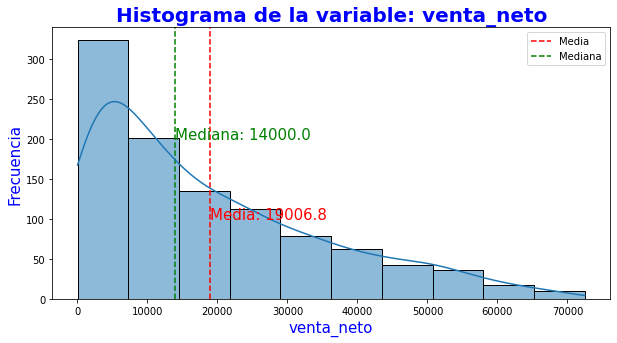

In [56]:

# A través de un ciclo for se visualiza el histograma de las variables numéricas
for i in var_int:
    plt.subplots(figsize=(10,5))
    # Se incluye el título de la gráfica
    plt.title('Histograma de la variable: ' + i, fontsize=20, color='blue', fontweight='bold')
    # Incluir una línea vertical en la media y la mediana
    plt.axvline(df[i].mean(), color='red', label='Media', linestyle='--')
    plt.axvline(df[i].median(), color='green', label='Mediana', linestyle='--')
    # Se incluyen los valores de la media y la mediana
    plt.text(df[i].mean(), 100, 'Media: {:.1f}'.format(df[i].mean()), fontsize=15, color='red')
    plt.text(df[i].median(), 200, 'Mediana: {:.1f}'.format(df[i].median()), fontsize=15, color='green')    
    # Se incluye un título para el eje x
    plt.xlabel(i, fontsize=15, color='blue')
    # Se incluye un título para el eje y
    plt.ylabel('Frecuencia', fontsize=15, color='blue')
    # Se crea el histograma
    sns.histplot(x=i, data=df, palette='hls', kde=True, bins=10)
    # Se muestra la legenda
    plt.legend()
    # Se muestra la gráfica
    plt.show();

In [57]:
mediana_venta_neto = df.venta_neto.median()
media_venta_neto = df.venta_neto.mean()
curtosis_venta_neto = df.venta_neto.kurtosis()
coef_asimetria_venta_neto = df.venta_neto.skew()
print(f'Mediana: {mediana_venta_neto:.2f}')
print(f'Media: {media_venta_neto:.2f}')
print(f'Curtosis: {curtosis_venta_neto:.2f}')
print(f'Coeficiente de asimetría: {coef_asimetria_venta_neto:.2f}')


Mediana: 14000.00
Media: 19006.80
Curtosis: 0.12
Coeficiente de asimetría: 0.98


### Comentario sobre la distribución de la variable objetivo: ventas_netas
1. Se observa que la variable objetivo no tiene una distribución normal, ya que está sesgada a la izquierda.
2. Se observa que la variable objetivo tiene una mediana de ***14000***, lo que indica que el 50% de los datos son menos a este valor
3. El promedio de ***19006,8***, es mayor a la media, lo que indica que la distribución está sesgada a la izquierda.
4. La curtosi es una medida que indica la forma de distribución de los datos en relación con la distribución normal. Un valor de ***0,12*** sugiere que la distribución es platicúrtica, es decir, tiene una forma más achatada que la distribución normal.
5. El coeficiente de asimetría es una medida que indica la asimetría de la distribución de los datos, puede ser positivo o negativo. Un valor de ***0.98*** sugiere que la distribución está sesgada a la derecha con una cola larga en el lado derecho, y la mayoría de los valores están en el lado izquierdo.

### Perfilamiento de Tiendas

In [78]:
tabla_tiendas_1 = pd.pivot_table(df, index=['store'], values=['venta_neto'],
                                    aggfunc=['sum','mean', 'std']).round(1) # El argumento round, redondea a 1 decimal
tabla_tiendas_1.sort_values(by=('sum','venta_neto'), ascending=False).head(3)

,sum,mean,std
,venta_neto,venta_neto,venta_neto
store,,,
1,9368095,18773.7,16607.8
4,3520061,19887.4,16606.8
2,3287797,19115.1,17104.8


## Búsqueda de perfil de cliente a través de una tabla de contingencia de la variable objetivo: ventas_netas
* Se usa la librería pandas, el método pivot_table, la cual permite crear una tabla muy parecida a trabajar con tablas dinámicas en Excel.
* Permite agregar funciones de calculo como la media, mediana, desviación estándar, etc. llamando a la función aggfunc

In [70]:
tabla_perfiles_3 = pd.pivot_table(df, index=['sex','nse','store','channel'], values=['venta_neto','time','age2'],
                                    aggfunc=['mean', 'std']).round(1) # El argumento round, redondea a 1 decimal
tabla_perfiles_3.sort_values(by=('mean','venta_neto'), ascending=False).head(3)

mean                    std                 
                          age2   time venta_neto age2  time venta_neto
sex nse store channel                                                 
M   B   3     internet    33.4  166.8    26990.4  7.9  53.8    15842.8
F   B   4     presencial  32.3   33.7    26389.4  4.1  30.0    20609.7
M   C   2     internet    30.8  178.8    24861.4  3.0  67.7    26772.8

### 3 Principales Perfiles de clientes:
* Se limita la pivot_table desarrollada, ordenandola, y limitando la cantidad de registros a 3 primeros.

In [68]:
# Se ordena la tabla por la variable venta_neto (que es un promedio)
tabla_perfiles_3.sort_values(by=('mean','venta_neto'), ascending=False).head(3)
# Y con head(3) Se muestran los 2 primeros registros

mean                    std                 
                          age2   time venta_neto age2  time venta_neto
sex nse store channel                                                 
M   B   3     internet    33.4  166.8    26990.4  7.9  53.8    15842.8
F   B   4     presencial  32.3   33.7    26389.4  4.1  30.0    20609.7
M   C   2     internet    30.8  178.8    24861.4  3.0  67.7    26772.8

## Anexo: sección de análisis por cuantiles

* En clase les comenté que sería interesante analizar los datos por cuantiles, para ver si existen diferencias entre los grupos de clientes.
* Para esto, hice un pequeño acercamiento para que tengan el código y puedan replicarlo en sus trabajos.
* ***NO ES PARTE DE LA EVALUACIÓN***

In [ ]:
df.venta_neto.describe()

In [ ]:
# Se crea una variable Cuantiles
# A través de un ciclo for e ifelse se calcula el cuantil de la variable venta_neto
# Se calcula a través de la funcion np.quantile()
# Se crea una lista vacía
cuantiles = []
# Se crea un ciclo for
for i in df.venta_neto:
    # Se crea un ifelse
    if i <= 5227.5:
        cuantiles.append('Q1')
    elif i > 5227.5 and i <= 14194:
        cuantiles.append('Q2')
    elif i > 14194 and i <= 28549:
        cuantiles.append('Q3')
    else:
        cuantiles.append('Q4')

# Se crea una nueva variable en el dataframe
df['cuantiles'] = cuantiles

In [ ]:
# Visualizamos la nueva variable
df[['venta_neto', 'cuantiles']].sample(10)

### Tabla de contingencia de la variable objetivo: ventas_netas

1. El objetivo de este análisis es visualizar la distribución de la variable objetivo, respecto a algunas variables que nos ayuden a definir un perfil de cliente.

In [ ]:
tabla_cuantiles = pd.pivot_table(df, index=['cuantiles','channel','nse','store','sex'], values='venta_neto',
                                 aggfunc=['mean','std'])
tabla_cuantiles.sort_values(by=('mean','venta_neto'), ascending=False).head(3)

In [ ]:
tabla_perfiles_2 = pd.crosstab([df.buy,df.sex, df.store],[df.cuantiles], margins=True)
tabla_cuantiles_2


## Se crea un dataframe temporal para analizar los cuantiles

In [ ]:
df_cuantiles = pd.DataFrame(df[['venta_neto', 'cuantiles']])
df_cuantiles.sample(10)

In [ ]:
# Se crean subplots para visualizar los histogramas de los cuantiles
fig, axes = plt.subplots(
    figsize=(13, 10), nrows=2, ncols=2, sharex=False, sharey=True)
fig.suptitle('Histogramas de los cuantiles', fontsize=20, color='blue', fontweight='bold' ,y=1.05, x=0.5)
# Se crea un ciclo for para visualizar los histogramas
for i, ax in enumerate(axes.flatten()):
    ax.hist(df_cuantiles[df_cuantiles.cuantiles == 'Q' + str(i+1)].venta_neto,
            bins=10, color='blue', alpha=0.5)
    ax.set(title='Cuantil: Q' + str(i+1), xlabel='Venta neta', ylabel='Frecuencia')
    ax.axvline(df_cuantiles[df_cuantiles.cuantiles == 'Q' + str(i+1)].venta_neto.mean(),
               color='red', label='Media', linestyle='--')
    ax.axvline(df_cuantiles[df_cuantiles.cuantiles == 'Q' + str(i+1)].venta_neto.median(),
               color='green', label='Mediana', linestyle='--')
    ax.legend()

### Análisis: ventas_netas vs edad por cuantiles

In [ ]:
# A través de un scatter plot se visualiza la relación entre las variables venta_neto y age2
plt.figure(figsize=(10,5))
# Se incluye el título de la gráfica
plt.title('Relación entre las variables: venta_neto y age2', fontsize=20, color='blue', fontweight='bold')
# Se incluye un título para el eje x
plt.xlabel('Edad', fontsize=15, color='blue')
# Se incluye un título para el eje y
plt.ylabel('Venta neta', fontsize=15, color='blue')
# Se crea el scatter plot
sns.lineplot(x='age2', y='venta_neto',data=df,hue='cuantiles',palette='hls')
# Se muestra la gráfica
plt.show();

In [ ]:
# Análisis de las ventas netas por tienda y sexo
# Definición de la paleta de colores
sns.set_theme(style="ticks", palette="pastel")
plt.title('Análisis de las ventas netas por tienda y sexo', fontsize=20, color='blue', fontweight='bold')
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="store", y="venta_neto",
            hue="sex",data=df)
sns.despine(offset=10, trim=True)


In [ ]:
# Analisis de las ventas netas por cuantil y canal
# Definición de la paleta de colores
sns.set_theme(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cuantiles", y="venta_neto",
            hue="channel",data=df)
sns.despine(offset=10, trim=True)
plt.title('Analisis de las ventas netas por cuantil y canal', fontsize=20, color='blue', fontweight='bold')

In [ ]:
# Analisis de las ventas netas por sexo
# Definición de la paleta de colores
sns.set_theme(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="sex", y="venta_neto",
            hue="cuantiles",data=df)
sns.despine(offset=10, trim=True)
plt.title('Analisis de las ventas netas por sexo', fontsize=20, color='blue', fontweight='bold')
plt.show();

In [ ]:
# Scatter catplot de las ventas netas por canal
sns.catplot(x="channel", y="venta_neto",hue="cuantiles",alpha=.5,
            palette="dark",height=6, data=df)
plt.title('Relación entre las variables: venta_neto y channel', fontsize=20, color='blue', fontweight='bold')
plt.show();

# 3. Respuesta a las preguntas planteadas (2ptos)
* Hallazgos
* Conclusiones

### El perfil de la tienda más rentable es:

* Tienda Más Rentable: ***1***
    * Tienda con mayor venta neta: ***9.368.095*** en total.
    * Tienda con mayor venta neta promedio: ***18.773,7*** en promedio (std 16.607,8)
* Tienda Segunda Más Rentable: ***4***
    * Tienda con mayor venta neta: ***3.520.061*** en total.
    * Tienda con mayor venta neta promedio: ***19.887,4*** en promedio (std 16.606,8)
* Tienda Tercera Más Rentable: ***2***
    * Tienda con mayor venta neta: ***3.287.797*** en total.
    * Tienda con mayor venta neta promedio: ***19.115,1*** en promedio (std 17.104,8)

### Los perfiles de clientes con mayor venta neta ***PROMEDIO*** son (de mayor a menor):
* Perfíl 1°:
    * Masculino
    * NSE B
    * Compra en la tienda 3 por internet
    * Se demora 166 minutos (std 53.8) comprando
    * 30 años (sdt 7.9 años)
    * Venta neta promedio de 30224.0 (std 15842.8)

* Perfíl 2°:
    * Masculino
    * NSE B
    * Compra en la tienda 4 por internet
    * Se demora 119 minutos (std 69.4) comprando
    * 32 años (sdt 8.6 años)
    * Venta neta promedio de 24107.0 (std 18016.7)

* Perfíl 3°:
    * Femenino
    * NSE A
    * Compra en la tienda 4 por internet
    * Se demora 150.5 minutos (std 44.1) comprando
    * 30 años (sdt 3.7 años)
    * Venta neta promedio de 23736.0 (std 16305.6)

## 3 Principales Conclusiones:
1. Respecto a las tiendas más rentables, se observa que las tiendas 1, 4 y 2 son las más rentables.
2. Respecto a los perfiles de clientes con mayor venta neta promedio, se observa que los clientes que compran en la tienda 3 por internet, son los que tienen mayor venta neta promedio.
3. Respecto a los datos de la variable objetivo, se observa que la distribución de los datos no es normal, ya que está sesgada a la izquierda, y tiene una cola larga en el lado derecho.